In [40]:
import pandas as pd
import os
import numpy as np
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Data Preparation

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

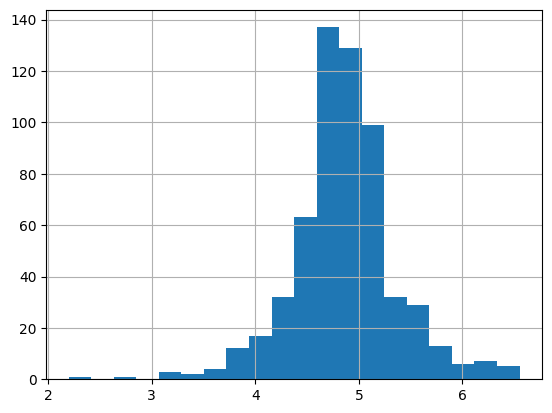

In [44]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [45]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome']=np.log(df['TotalIncome'])

In [46]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
dtype: int64

In [47]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352,
        8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425,
        8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587,
        8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<ipython-input-48-9d297df3c030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette = 'Set1')


<Axes: xlabel='Gender', ylabel='count'>

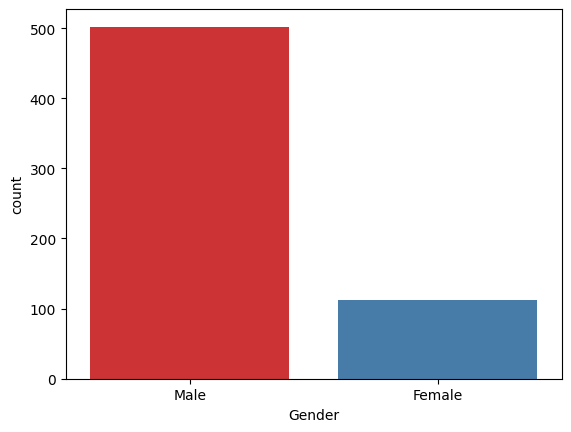

In [48]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set1')

number of people who take loan as group by loan amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<ipython-input-49-b7d6a2505796>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df, palette = 'Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

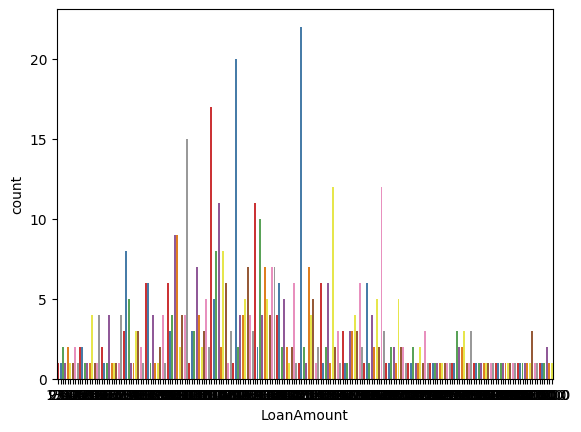

In [49]:
print("number of people who take loan as group by loan amount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette = 'Set1')

#Data PreProcessing


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [51]:
for i in range(0,5):
  X_train[:,i]= LabelEncoder_x.fit_transform(X_train[:,i])
  X_train[:,7]= LabelEncoder_x.fit_transform(X_train[:,7])

In [52]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [53]:
for i in range(0,5):
  X_test[:,i]= LabelEncoder_x.fit_transform(X_test[:,i])
  X_test[:,7]= LabelEncoder_x.fit_transform(X_test[:,7])

y_test = LabelEncoder_y.fit_transform(y_test)

#Model Training

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [58]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy of GaussianNB is :", metrics.accuracy_score(y_pred, y_test))


Accuracy of GaussianNB is : 0.8292682926829268


In [59]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])